<span style="font-size:22px;">***- Importing Data from file***.</span>

In [1]:
import pandas as pd

Data = pd.read_csv("league_of_legends_data_large.csv")
Data.head()


,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


<span style="font-size:20px;">"win" is a target variable and the remaining are features.</span>

In [2]:
X = Data.drop('win', axis=1)
#X = Data['kills, assists']#, 'assists', 'gold_earned', 'cs', 'wards_placed', 'wards_killed', 'damage_dealt']
y = Data['win']
X.head()
#X.shape
#y.head()
#print(X.iloc[0,0])

,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,16,6,19,17088,231,11,7,15367
1,8,8,5,14865,259,10,2,38332
2,0,17,11,15919,169,14,5,24642
3,19,11,1,11534,264,14,3,15789
4,12,7,6,18926,124,15,7,40268


<span style="font-size:22px;">***- Splitting Data into Training and Testing***.</span>

In [3]:
import torch
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<span style="font-size:22px;">***- Normalize Data***.</span>

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:10,:])
print(type(y_train))
print(type(X_train))

[[-0.21206084  0.43457483 -1.59772642 -1.04547004  1.07067575 -1.00919453
   0.14245462 -0.87600199]
 [ 0.48969168 -0.0890093  -0.38057665 -1.0217178   0.32346339  0.03255466
  -0.1997787   0.47278784]
 [ 1.01600606  0.60910287  1.01045166 -0.53762456 -1.3923576  -0.31469507
   0.48468793  0.1785985 ]
 [-0.73837522 -0.61259343  0.66269458  0.85131585 -0.38223718  1.24792872
   0.48468793 -0.57206772]
 [ 0.6651298  -0.0890093   1.35820873  0.02586902 -1.48921846  1.59517845
  -1.22647864  1.03315945]
 [-0.21206084 -0.43806539  1.53208727  0.85968569  1.18137388  0.55342926
   0.48468793  1.26473572]
 [ 1.54232044  0.26004678  0.3149375   0.33464811 -1.14328681  0.20617953
   1.16915456  0.22655581]
 [ 1.01600606  1.30721505 -1.24996934  1.0286659   0.25427706  0.03255466
  -0.1997787   1.55884832]
 [-0.56293709 -1.31070561  0.83657312  0.39482045  1.55498007  0.72705412
   0.48468793  0.00856105]
 [-0.03662271  0.95815896  1.70596581  1.20149171  0.8077677   0.03255466
   0.82692124  0.

<span style="font-size:22px;">***- Convert from pd data frame to Torch***.</span>

In [5]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


In [6]:
print(y_test)

tensor([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 0.])


<span style="font-size:22px;">***- Define the Logistic Regression Model***.</span>

In [7]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    """This class inherits nn.Module and defines the logistic regression model."""
    def __init__(self, number_input_features):
        super(LogisticRegressionModel, self).__init__()
        self.function1 = nn.Linear(number_input_features, 1)

    def forward(self, x):
        x = self.function1(x)
        x = torch.sigmoid(x)
        return x
    
number_features = X_train.shape[1]
model = LogisticRegressionModel(number_features)


<span style="font-size:22px;">***- Define Loss Function and Optimizer***.</span>

In [8]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

<span style="font-size:22px;">***- Train the Model without weight decay***.</span>

In [9]:
losses = []
epochs = 1000
import numpy as np
#print(model_output)
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    #print(outputs.shape)
    #print(y_test.shape)
    #print(outputs)
    loss = criterion(outputs.squeeze(dim=1), y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print("Number of epochs: ", epoch + 1, ", Loss: ", loss.item())
    losses.append(loss.item())

    with torch.no_grad():
        model.eval()
        eval_output_train = model(X_train)
        eval_output_test = model(X_test)
        predictions_train = (eval_output_train.squeeze(dim=1) > 0.5).float()
        predictions_test = (eval_output_test.squeeze(dim=1) > 0.5).float()
        correctness_train = (predictions_train == y_train).sum().item()
        correctness_test = (predictions_test == y_test).sum().item()
        accuracy_train = correctness_train / y_train.size(0)
        accuracy_test = correctness_test / y_test.size(0)
        if (epoch + 1) % 100 == 0:
            print("Accuracy Train: ", accuracy_train, "Accuracy Test: ", accuracy_test)


Number of epochs:  100 , Loss:  0.7227392792701721
Accuracy Train:  0.52125 Accuracy Test:  0.46
Number of epochs:  200 , Loss:  0.7092546820640564
Accuracy Train:  0.52 Accuracy Test:  0.45
Number of epochs:  300 , Loss:  0.7004982829093933
Accuracy Train:  0.51125 Accuracy Test:  0.44
Number of epochs:  400 , Loss:  0.6948931217193604
Accuracy Train:  0.5075 Accuracy Test:  0.465
Number of epochs:  500 , Loss:  0.6913359761238098
Accuracy Train:  0.52375 Accuracy Test:  0.47
Number of epochs:  600 , Loss:  0.6890890002250671
Accuracy Train:  0.535 Accuracy Test:  0.47
Number of epochs:  700 , Loss:  0.68767249584198
Accuracy Train:  0.5375 Accuracy Test:  0.475
Number of epochs:  800 , Loss:  0.6867800951004028
Accuracy Train:  0.535 Accuracy Test:  0.485
Number of epochs:  900 , Loss:  0.6862174868583679
Accuracy Train:  0.54 Accuracy Test:  0.5
Number of epochs:  1000 , Loss:  0.6858624815940857
Accuracy Train:  0.54625 Accuracy Test:  0.505


<span style="font-size:22px;">***- Define Loss Function and Optimizer***.</span>

<span style="font-size:22px;">***- Train the model with weight decay (L2 regularization)***.</span>

In [123]:

new_model = LogisticRegressionModel(number_features)
optimizer = torch.optim.SGD(new_model.parameters(), lr=0.01, weight_decay=0.01)
losses = []
epochs = 1000
import numpy as np
#print(model_output)
for epoch in range(epochs):
    new_model.train()
    optimizer.zero_grad()
    model_output = new_model(X_train)

    loss = criterion(model_output.squeeze(dim=1), y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print("Number of epochs: ", epoch + 1, ", Loss: ", loss.item())
    losses.append(loss.item())

    with torch.no_grad():
        new_model.eval()
        eval_output_train = new_model(X_train)
        eval_output_test = new_model(X_test)
        predictions_train = (eval_output_train.squeeze(dim=1) > 0.5).float()
        predictions_test = (eval_output_test.squeeze(dim=1) > 0.5).float()
        correctness_train = (predictions_train == y_train).sum().item()
        correctness_test = (predictions_test == y_test).sum().item()
        accuracy_train = correctness_train / y_train.size(0)
        accuracy_test = correctness_test / y_test.size(0)
        if (epoch + 1) % 100 == 0:
            print("Accuracy Train: ", accuracy_train, "Accuracy Test: ", accuracy_test)

Number of epochs:  100 , Loss:  0.7278850674629211
Accuracy Train:  0.5075 Accuracy Test:  0.49
Number of epochs:  200 , Loss:  0.7114505767822266
Accuracy Train:  0.51125 Accuracy Test:  0.52
Number of epochs:  300 , Loss:  0.7012290954589844
Accuracy Train:  0.51375 Accuracy Test:  0.53
Number of epochs:  400 , Loss:  0.6949751377105713
Accuracy Train:  0.52625 Accuracy Test:  0.53
Number of epochs:  500 , Loss:  0.6911787986755371
Accuracy Train:  0.5425 Accuracy Test:  0.535
Number of epochs:  600 , Loss:  0.6888796091079712
Accuracy Train:  0.545 Accuracy Test:  0.52
Number of epochs:  700 , Loss:  0.6874856352806091
Accuracy Train:  0.55875 Accuracy Test:  0.515
Number of epochs:  800 , Loss:  0.686637818813324
Accuracy Train:  0.5425 Accuracy Test:  0.525
Number of epochs:  900 , Loss:  0.6861196756362915
Accuracy Train:  0.545 Accuracy Test:  0.535
Number of epochs:  1000 , Loss:  0.6858013272285461
Accuracy Train:  0.5475 Accuracy Test:  0.54


<span style="font-size:22px;">***- Report with Model Metrics: Confusion Matrix, ROC curve, Precision, Recall and F1-Score***.</span>

47
Precision:  0.5596330275229358
Recall:  0.580952380952381
F1-Score:  0.5700934579439252


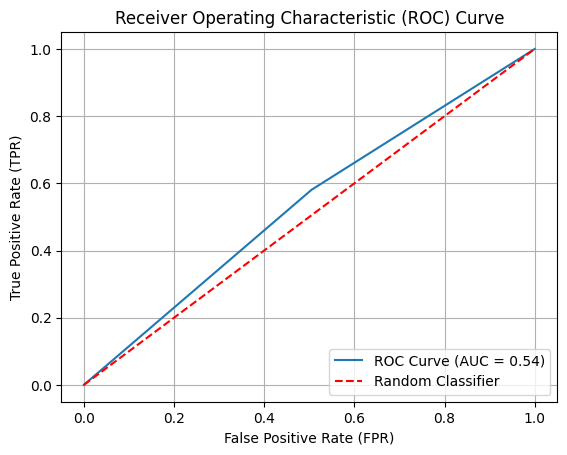

In [124]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions_test)
print(conf_matrix[0][0])
type(conf_matrix)

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, predictions_test)
roc_auc = roc_auc_score(y_test, predictions_test)

precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
f1 = f1_score(y_test, predictions_test)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

plt.plot(false_pos_rate, true_pos_rate, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<span style="font-size:22px;">***- Saving the Model (last one generated)***.</span>

In [47]:
torch.save(new_model, "new_model.pth")
print("Entire model saved.")

Entire model saved.


<span style="font-size:22px;">***- Loading the Model and Evaluating it***.</span>

In [64]:
loaded_model = torch.load("new_model.pth")
loaded_model.eval()

with torch.no_grad():
    output_loaded_model = loaded_model(X_test)
output_loaded_model.shape
predictions_loaded_model = (output_loaded_model.squeeze(dim=1) > 0.5).float()
accuracy_loaded_model = (predictions_loaded_model == y_test).sum().item() / len(y_test)

print("The accuracy for the loaded model is: ", accuracy_loaded_model)

The accuracy for the loaded model is:  0.51


<span style="font-size:22px;">***- Hyperparameters Tuning***.</span>

In [92]:
learning_rates = [0.01, 0.05, 0.1]
best_lr = 0.0
best_accuracy = 0.0
thresholds = 0.5

for learning_rate in learning_rates:

    models = LogisticRegressionModel(number_features)
    optimizer = torch.optim.SGD(models.parameters(), lr=learning_rate)

    print("\nTraining Model with Learning Rate equal to: ", learning_rate, "\n")
    losses = []
    epochs = 1000

    #print(model_output)
    for epoch in range(epochs):
        models.train()
        optimizer.zero_grad()
        model_output = models(X_train)

        loss = criterion(model_output.squeeze(dim=1), y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print("Number of epochs: ", epoch + 1, ", Loss: ", loss.item())
        losses.append(loss.item())

        with torch.no_grad():
            models.eval()
            eval_output_train = models(X_train)
            eval_output_test = models(X_test)
            predictions_train = (eval_output_train.squeeze(dim=1) > thresholds).float()
            predictions_test = (eval_output_test.squeeze(dim=1) > thresholds).float()
            correctness_train = (predictions_train == y_train).sum().item()
            correctness_test = (predictions_test == y_test).sum().item()
            accuracy_train = correctness_train / y_train.size(0)
            accuracy_test = correctness_test / y_test.size(0)
            if (epoch + 1) % 100 == 0:
                print("Accuracy Train: ", accuracy_train, "Accuracy Test: ", accuracy_test)

    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_lr = learning_rate

print("\nThe obtained best accuracy is: ", best_accuracy, "for a learning rate of: ", best_lr)


Training Model with Learning Rate equal to:  0.01 

Number of epochs:  100 , Loss:  0.7269760966300964
Accuracy Train:  0.4925 Accuracy Test:  0.51
Number of epochs:  200 , Loss:  0.71010422706604
Accuracy Train:  0.5 Accuracy Test:  0.51
Number of epochs:  300 , Loss:  0.6999495625495911
Accuracy Train:  0.51375 Accuracy Test:  0.51
Number of epochs:  400 , Loss:  0.6939228177070618
Accuracy Train:  0.51875 Accuracy Test:  0.55
Number of epochs:  500 , Loss:  0.6903685927391052
Accuracy Train:  0.51125 Accuracy Test:  0.54
Number of epochs:  600 , Loss:  0.6882759928703308
Accuracy Train:  0.525 Accuracy Test:  0.52
Number of epochs:  700 , Loss:  0.6870430111885071
Accuracy Train:  0.53 Accuracy Test:  0.495
Number of epochs:  800 , Loss:  0.6863151788711548
Accuracy Train:  0.53625 Accuracy Test:  0.5
Number of epochs:  900 , Loss:  0.6858842968940735
Accuracy Train:  0.535 Accuracy Test:  0.495
Number of epochs:  1000 , Loss:  0.6856285929679871
Accuracy Train:  0.5425 Accuracy Te

<span style="font-size:22px;">***- Verifying features influence***.</span>

       Features  Importance
0         kills    0.130975
1        deaths   -0.005131
2       assists   -0.013663
3   gold_earned    0.175341
4            cs   -0.007268
5  wards_placed    0.106087
6  wards_killed   -0.034605
7  damage_dealt   -0.018873
       Features  Importance
3   gold_earned    0.175341
0         kills    0.130975
5  wards_placed    0.106087
1        deaths   -0.005131
4            cs   -0.007268
2       assists   -0.013663
7  damage_dealt   -0.018873
6  wards_killed   -0.034605


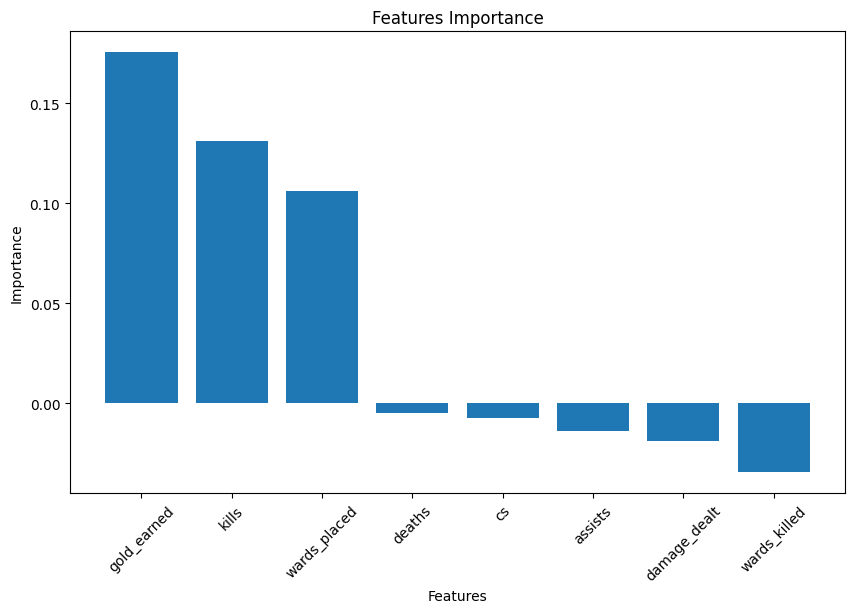

In [117]:
weights = models.function1.weight.data.numpy().flatten()
features = X.columns

feature_importance = pd.DataFrame({'Features': features, 'Importance': weights})
print(feature_importance)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['Features'], feature_importance['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.xticks(rotation=45)
plt.show()